Reference: https://github.com/enakai00/jupyter_tfbook

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
with open('./data/ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='bytes')
labels

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1,

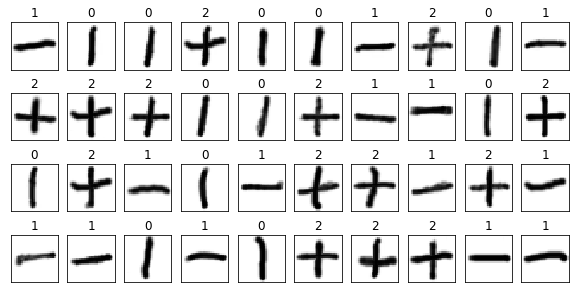

In [4]:
fig = plt.figure(figsize=(10,5))
for i in range(40):
    subplot = fig.add_subplot(4, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(images[i].reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
def edge_filter():
    
    filter0 = np.array(
    [[ 2, 1, 0,-1,-2],
     [ 3, 2, 0,-2,-3],
     [ 4, 3, 0,-3,-4],
     [ 3, 2, 0,-2,-3],
     [ 2, 1, 0,-1,-2]]) / 23.0
    
    filter1 = np.array(
    [[ 2, 3, 4, 3 ,2],
     [ 1, 2, 3, 2, 1],
     [ 0, 0, 0, 0, 0],
     [-1,-2,-3,-2,-1],
     [-2,-3,-4,-3,-2]]) / 23.0
    
    filter_array = np.zeros([5,5,1,2])
    filter_array[:,:,0,0] = filter0
    filter_array[:,:,0,1] = filter1
    
    return tf.constant(filter_array, dtype=tf.float32)

In [6]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv = edge_filter()
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv - 0.2)
h_pool = tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [10]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [11]:
filter_vals, conv_vals = sess.run([W_conv, h_conv_cutoff], feed_dict={x:images[:9]})

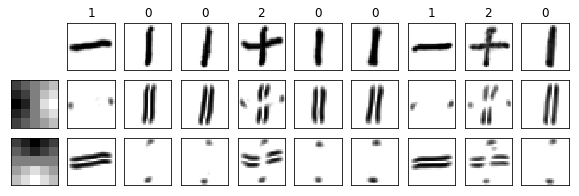

In [16]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals)

for i in range(9):
    
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')

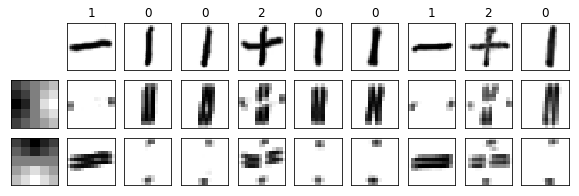

In [18]:
pool_vals = sess.run(h_pool, feed_dict={x:images[:9]})
v_max = np.max(pool_vals)

fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals)

for i in range(9):
    
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
sess.close()